# Depression Project
Depression is more than simply feeling unhappy or fed up for a few days.

Most people go through periods of feeling down, but when you're depressed you feel persistently sad for weeks or months, rather than just a few days.

Some people think depression is trivial and not a genuine health condition. They're wrong – it is a real illness with real symptoms. Depression is not a sign of weakness or something you can "snap out of" by "pulling yourself together".

The available data are results of the NHNES (National Health and Nutrition Examination Survey), carried out annually in the USA to assess the health and nutrition of adults and children;

Questions:

What is the profile of individuals (adults over 18 years old) with depressive symptoms in the USA in the period 2005-2006?

Are healthy eating habits and physical activity associated with lower rates of depression in this population?

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
# Pacote statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, sem, t, ttest_ind, chi2_contingency, norm
import scipy.stats as stats
from scipy.stats import f_oneway, sem, t, ttest_ind, chi2_contingency, norm


In [2]:
#Reading the first Dataset 
df = pd.read_csv('DEMO_PHQ.csv')
df

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0


In [3]:
#eDeleting null values
df = df.dropna()

In [4]:
#adding all the values​of the answers from 1 to 13, replacing answers that do not add value to the research.
#Removing number 7 - I don't know and 9 refuse to answer.abs
cols_to_sum =['DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090']
for col in cols_to_sum:
    df[col] = df[col].replace({7: 0, 9: 0})

/tmp/ipykernel_6474/373795309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace({7: 0, 9: 0})


In [5]:
#Summ all the coluns: DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090
#checking the dataset size
df['RANK'] = df[cols_to_sum].sum(axis=1)
df.shape[0] #entradas, #variaveis

/tmp/ipykernel_6474/579386833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RANK'] = df[cols_to_sum].sum(axis=1)


4800

In [6]:
#df.isnul()
#df.info()
#df.describe()

In [7]:
#Reading the second dataset with diet information
df2 = pd.read_csv('PAG_HEI.csv')
df2

,SEQN,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
9420,41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
9421,41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467
9422,41473,685.912240,3.0,3.907340,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,7.458058,10.000000,1.676912,2.751168,45.793478


In [8]:
#edeleting null values
#df2.isnull().sum()
df2.dropna(axis = 0, inplace=True)

In [9]:
#Two different ways to merge bpth datasets
#df_merge = pd.merge(df, df2, on = ['SEQN']).drop_duplicates(ignore_index = True)
#Merging both datasets based on Id 'SEQN' replacing all the duplicate values based on ID value
df_merge = pd.merge(df, df2, on='SEQN', how='inner')
df_merge.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131


In [10]:
df_merge.shape[0]
df_merge.columns

Index(['SEQN', 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060',
       'DPQ070', 'DPQ080', 'DPQ090', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1',
       'DMDEDUC', 'INDFMINC', 'RANK', 'PAG_MINW', 'ADHERENCE',
       'HEI2015C1_TOTALVEG', 'HEI2015C2_GREEN_AND_BEAN',
       'HEI2015C3_TOTALFRUIT', 'HEI2015C4_WHOLEFRUIT', 'HEI2015C5_WHOLEGRAIN',
       'HEI2015C6_TOTALDAIRY', 'HEI2015C7_TOTPROT', 'HEI2015C8_SEAPLANT_PROT',
       'HEI2015C9_FATTYACID', 'HEI2015C10_SODIUM', 'HEI2015C11_REFINEDGRAIN',
       'HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE'],
      dtype='object')

Analise Univariada
variaveis numericas
Column RANK Sum of questions on the first dataset 'df' 

Text(0.5, 1.0, 'RANK count')

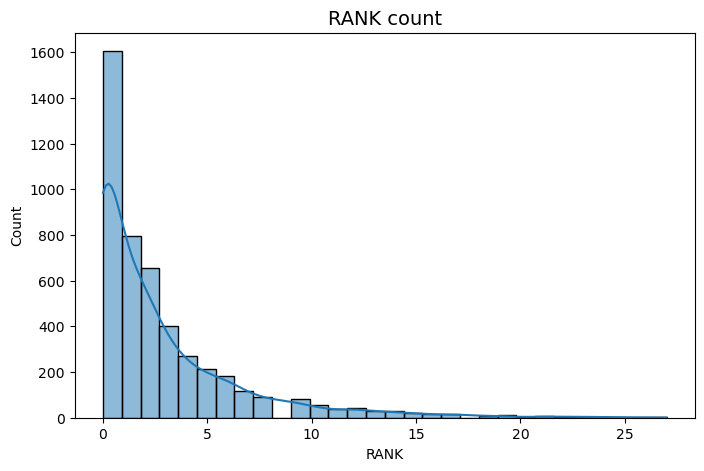

In [11]:
#Creating a histogrtam about RANK ( Sum of 'DPQ010', 'DPQ020', 'DPQ030', 'DPQ040', 'DPQ050', 'DPQ060', 'DPQ070', 'DPQ080', 'DPQ090') 
plt.figure(figsize=(8,5))
sns.histplot(df_merge['RANK'], bins=30, kde= True)
plt.title('RANK count', fontsize=14)

Text(0.5, 1.0, 'Age')

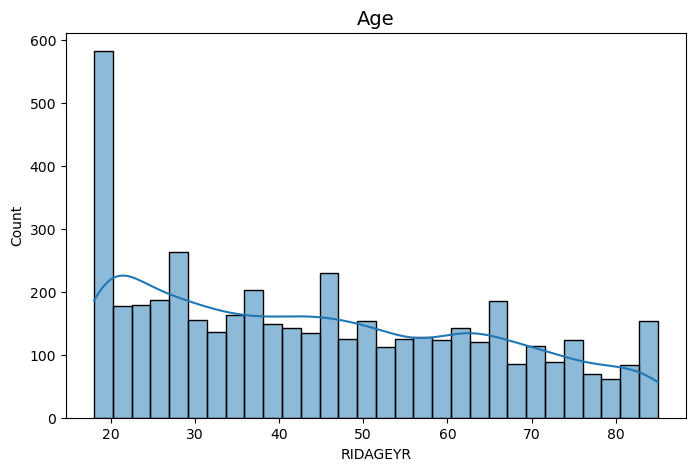

In [12]:
#Creating a histogram to age 
plt.figure(figsize=(8,5))
sns.histplot(df_merge['RIDAGEYR'], bins=30, kde= True)
plt.title('Age', fontsize=14)

In [13]:
#More details about age
df_merge['RIDAGEYR'].describe()

count    4702.000000
mean       44.918120
std        19.849216
min        18.000000
25%        27.000000
50%        43.000000
75%        61.000000
max        85.000000
Name: RIDAGEYR, dtype: float64

Regarding age, we have a more uniform distribution. The average age is 44 years, with a median of 43. Our standard deviation is 19 years. 
From the graph, you can see that we have a considerable number of users up to 20 years old. Furthermore, the maximum age collected was 85 years.

Text(0.5, 1.0, 'Distribution of physical activity in hours')

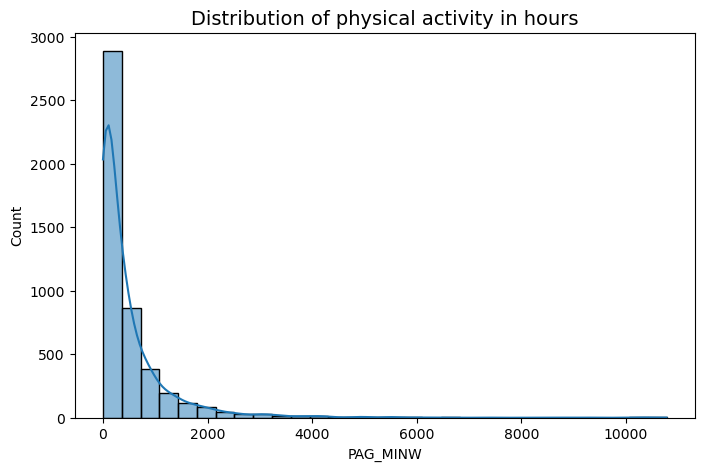

In [14]:
#Distribution of physical activity in hours
plt.figure(figsize=(8,5))
sns.histplot(df_merge['PAG_MINW'], bins= 30, kde=True)
plt.title('Distribution of physical activity in hours', fontsize=14)

In [15]:
#Atividade fisica media
df_merge['PAG_MINW'].describe()

count     4702.000000
mean       484.944251
std        796.184712
min          0.000000
25%         41.570439
50%        221.709007
75%        581.986143
max      10777.829099
Name: PAG_MINW, dtype: float64

1 week = 168 hours 10800 minutes
IMPOSSIBLE !
workout hours max 60 h week 3600min

In [16]:
#ploting again juts the maximium 60 h
df_merge['PAG_MINW'] = np.where(df_merge['PAG_MINW']>=3600, 3600, df_merge['PAG_MINW'])

Text(0.5, 1.0, 'Distribution of physical activity in hours')

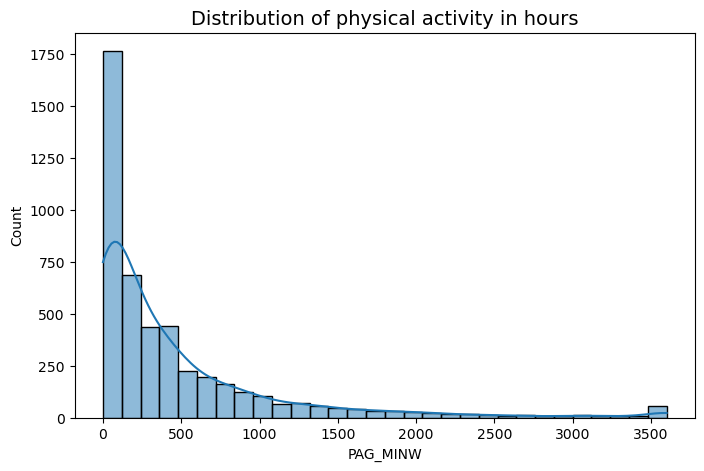

In [17]:
plt.figure(figsize=(8,5))
sns.histplot(df_merge['PAG_MINW'], bins=30, kde=True)
plt.title('Distribution of physical activity in hours', fontsize=14)

Text(0.5, 1.0, 'Nutritional score')

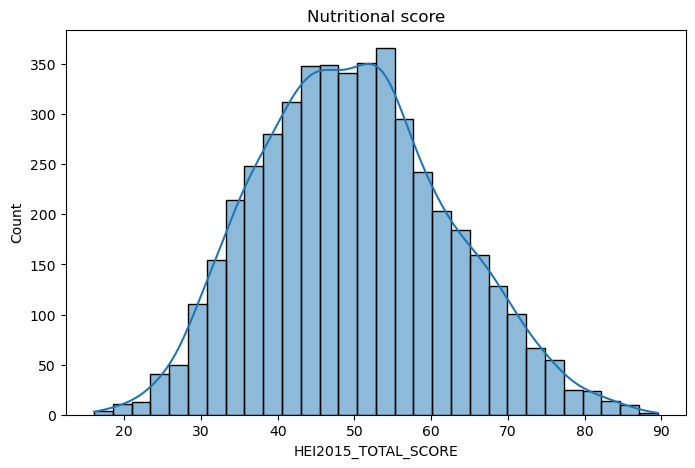

In [18]:
#Score nutritional
plt.figure(figsize=(8,5))
sns.histplot(df_merge['HEI2015_TOTAL_SCORE'], bins = 30, kde=True)
plt.title('Nutritional score')

Categorical variables
#Gender, race, education

/tmp/ipykernel_6474/720406496.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, ha='center')


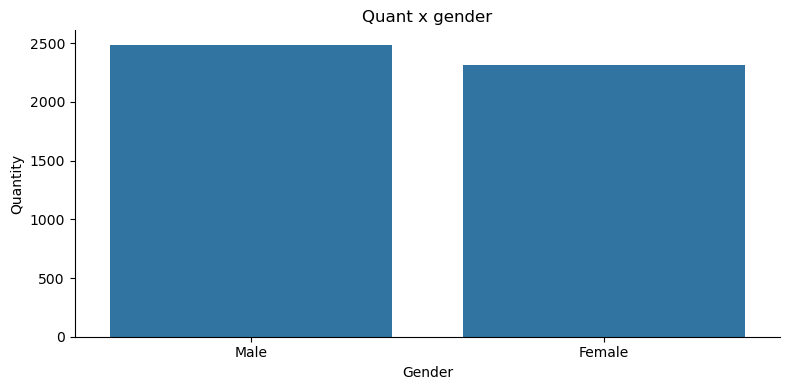

In [19]:
#Gender 
fig, ax = plt.subplots(figsize=(8,4))
count = df_merge['RIAGENDR'].value_counts()
sns.countplot(x='RIAGENDR', data=df, order=count.index)
ax.set_xlabel('Gender')
ax.set_ylabel('Quantity')
ax.set_title('Quant x gender')
#rotulos
labels = [ "Male", "Female"]
ax.set_xticklabels(labels, ha='center')
sns.despine(right=True) # remove borda 
plt.tight_layout()
plt.show()

/tmp/ipykernel_6474/2374605238.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(count.index, rotation=45, ha='right')  # Ajuste a rotação conforme necessário


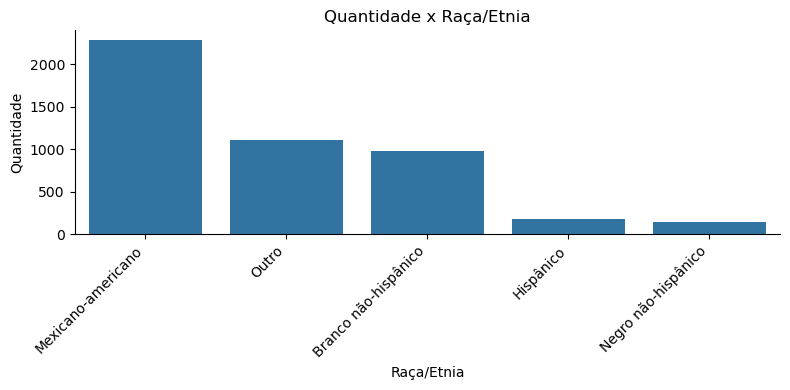

In [20]:
#ethnicity, values

race_ethnicity_mapping = {
    1: "Branco não-hispânico",
    2: "Negro não-hispânico",
    3: "Mexicano-americano",
    4: "Outro",
    5: "Hispânico"
}
df_merge['RIDRETH1_cat'] = df_merge['RIDRETH1'].replace(race_ethnicity_mapping)

fig, ax = plt.subplots(figsize=(8, 4))
count = df_merge['RIDRETH1_cat'].value_counts()
sns.countplot(x='RIDRETH1_cat', data=df_merge, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_xlabel('Raça/Etnia')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade x Raça/Etnia')

ax.set_xticklabels(count.index, rotation=45, ha='right')  # Ajuste a rotação conforme necessário

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()

/tmp/ipykernel_6474/859935038.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(count.index, rotation=45, ha='right')


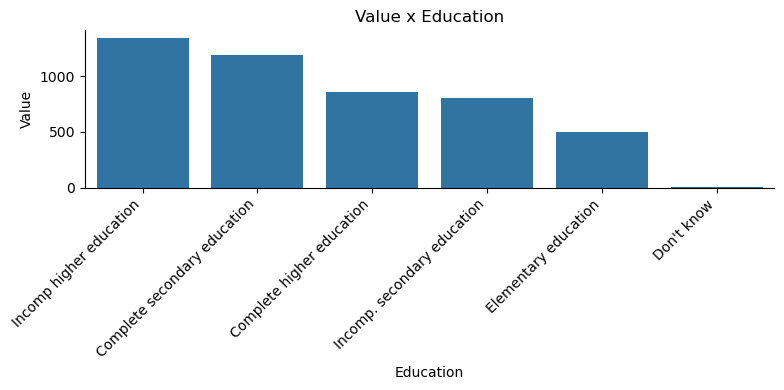

In [21]:
#Education

escolaridade_mapping = {
    1: "Elementary education",
    2: "Incomp. secondary education",
    3: "Complete secondary education",
    4: "Incomp higher education",
    5: "Complete higher education",
    9: "Don't know"
}

df_merge['DMDEDUC_cat'] = df_merge['DMDEDUC'].replace(escolaridade_mapping)


fig, ax = plt.subplots(figsize=(8, 4))
count = df_merge['DMDEDUC_cat'].value_counts()
sns.countplot(x='DMDEDUC_cat', data=df_merge, order=count.index)  # Aqui, estamos assegurando que os dados são plotados na ordem da contagem
ax.set_xlabel('Education')
ax.set_ylabel('Value')
ax.set_title('Value x Education')

# Rotação dos rótulos
ax.set_xticklabels(count.index, rotation=45, ha='right')

sns.despine(right=True)  # remove a borda direita para um visual mais limpo

plt.tight_layout()
plt.show()

In [22]:
#alocando renda familiar em categorias
# def categorize_income(value):
#     if value in [1, 2]:
#         return "Muito Baixa"
#     elif value in [3, 4]:
#         return "Baixa"
#     elif value in [5, 6, 7]:
#         return "Média"
#     elif value in [8, 9, 10]:
#         return "Alta"
#     elif value == 11:
#         return "Muito Alta"
#     else:  # Valores 12, 13, 77, 99
#         return "Indeterminado"

# df_merge['INDFMINC_cat'] = df_merge['INDFMINC'].apply(categorize_income)
# df_merge['INDFMINC_cat'].describe()

In [23]:
#categorizing the salary amount INDFMINC_cat 
def renda_cat(value):
    myDict = {
    **dict.fromkeys([1, 2], 'Very low'),
    **dict.fromkeys([3, 4], 'Low'),
    **dict.fromkeys([5,6,7], 'Medium'),
    **dict.fromkeys([8, 9, 10], 'High'),
    **dict.fromkeys([11], 'Very High'),
    }
    return myDict.get(value, 'Undetermined')

df_merge['INDFMINC_cat'] = df_merge['INDFMINC'].apply(renda_cat)
df_merge['INDFMINC_cat'].describe()

count       4702
unique         6
top       Medium
freq        1441
Name: INDFMINC_cat, dtype: object

/tmp/ipykernel_6474/3168408689.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(count.index, rotation=45, ha='right')


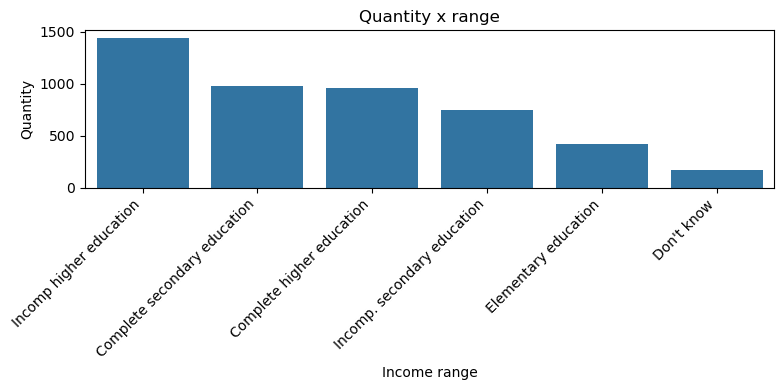

In [24]:
#Family income plot 
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x='INDFMINC_cat', data=df_merge, order=df_merge['INDFMINC_cat'].value_counts().index)
ax.set_xlabel('Income range')
ax.set_ylabel('Quantity')
ax.set_title('Quantity x range')

ax.set_xticklabels(count.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

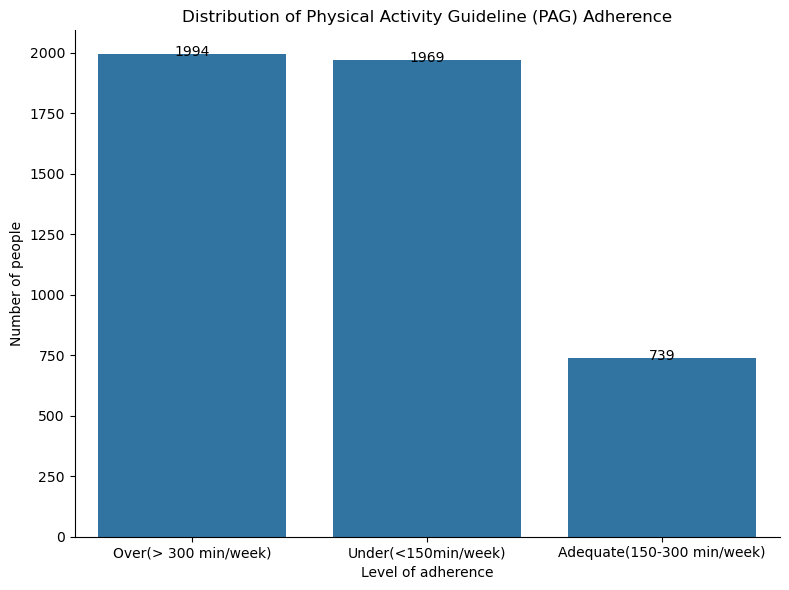

In [25]:
#Physical activity levels
ativ_fisica = [
    'Over(> 300 min/week)',
    'Under(<150min/week)',
    'Adequate(150-300 min/week)'
]

count = df_merge['ADHERENCE'].value_counts().reindex([3,1,2])

plt.figure(figsize=(8,6))
sns.barplot(x=count.index, y=count.values, order=[3, 1, 2])
plt.xticks(ticks=range(len(count)), labels=ativ_fisica)
plt.title('Distribution of Physical Activity Guideline (PAG) Adherence')
plt.ylabel('Number of people')
plt.xlabel('Level of adherence')

for index, value in enumerate(count.values):
    plt.text(index, value +10, str(value), ha='center', va='center')

sns.despine()
plt.tight_layout()
plt.show()

# Working with the Numerics variables
# Hipotesis: 
There is a correlation between health diet score and age
There is a correlation between health diet and the quantity of exercise per week

We are going to use the Pearson correlation:
the pearson correlations depict how strong is this correlation

H0: There is no correlation
Ha: There is correlation

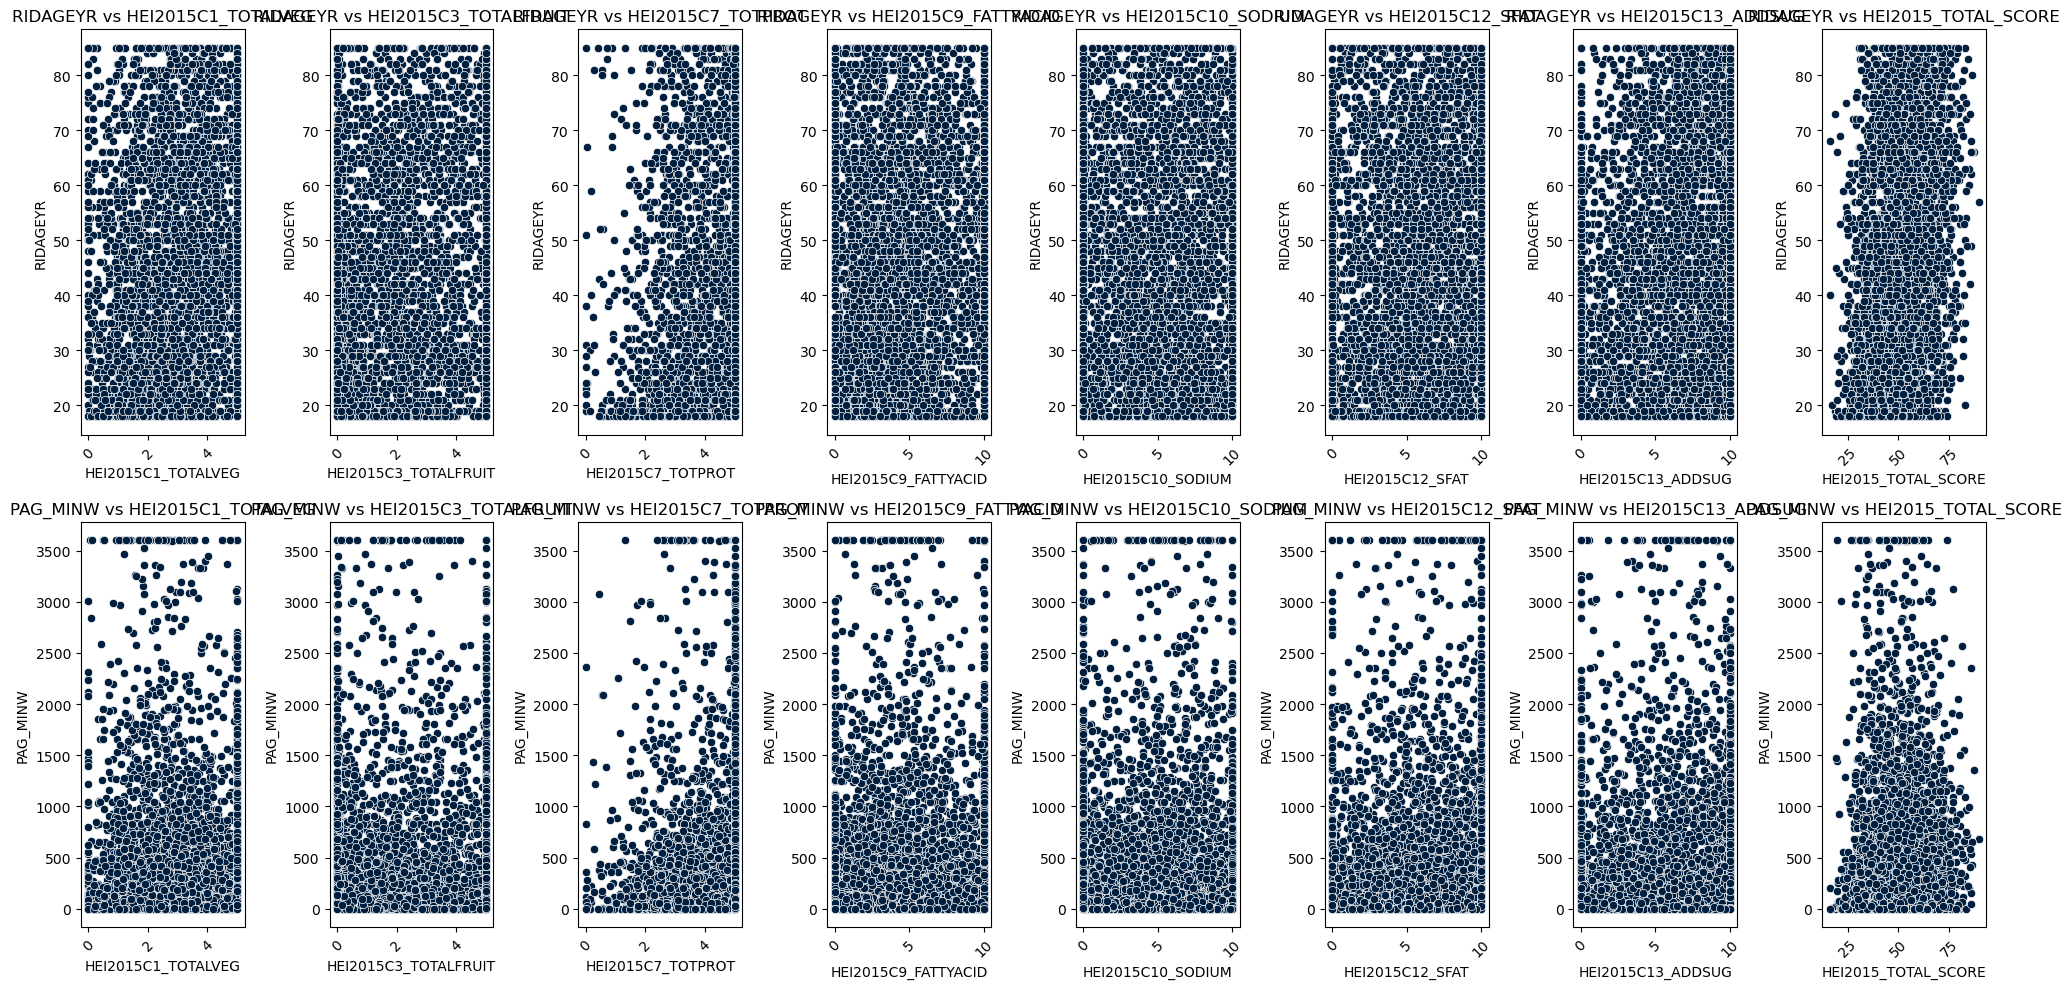

In [26]:
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0", "#a9a9a9"]
sns.set_palette(sns.color_palette(colors))

# Target variables: Age and amount of money 
vars_to_plot = ['RIDAGEYR', 'PAG_MINW']

#nutritional scores are the rrelates variables 
related_vars = ['HEI2015C1_TOTALVEG','HEI2015C3_TOTALFRUIT','HEI2015C7_TOTPROT', 'HEI2015C9_FATTYACID', 
                'HEI2015C10_SODIUM','HEI2015C12_SFAT', 'HEI2015C13_ADDSUG', 'HEI2015_TOTAL_SCORE']

# Quantidade de linhas e colunas para subplots
nrows = len(vars_to_plot)
ncols = len(related_vars)

# Plotando
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5*nrows))

# Ajusta o espaçamento entre subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)  # Ajusta espaçamento vertical (hspace) e horizontal (wspace) 

for i, var in enumerate(vars_to_plot):
    for j, rel_var in enumerate(related_vars):
        if var != rel_var:
            sns.scatterplot(x=rel_var, y=var, data=df_merge, ax=axes[i, j])
            axes[i, j].set_title(f'{var} vs {rel_var}')
            # Rotaciona a legenda
            axes[i, j].tick_params(axis='x', rotation=45)
      
plt.tight_layout()

# Pearson correlation between age and diet score

In [27]:
stats.pearsonr(df_merge.RIDAGEYR, df_merge.HEI2015_TOTAL_SCORE)

PearsonRResult(statistic=0.29871119696688436, pvalue=1.5921344259990885e-97)

# The pearson correlation between salary amount and Healthy Eating Index - Escore total
As p-value is < than significance level we can afirm that is a correlation between age and health diet

In [53]:
stats.pearsonr(df_merge.PAG_MINW, df_merge.HEI2015_TOTAL_SCORE)

PearsonRResult(statistic=0.007176252031492591, pvalue=0.6227481737585349)

# Physical activity x DPQ040 
How often have you felt tired or had low self-esteem?

In [58]:
#mapping the levels when felt tired or had low self-esteem. Transforming in categories 
DPQ040_mapping = {
    0: "Never",
    1: "Less than a week",
    2: "A week or more",
    3: "Almost every day",
}
df_merge['DPQ040_cat'] = df_merge['DPQ040'].replace(DPQ040_mapping)

In [59]:
#Mapping the adherence: ADHERENCE: Physical Activity Guideline (PAG).
aderencia_mapping = {
    1: "Low",
    2: "Adequate",
    3: "Higher",
}
df_merge['ADHERENCE_cat'] = df_merge['ADHERENCE'].replace(aderencia_mapping)

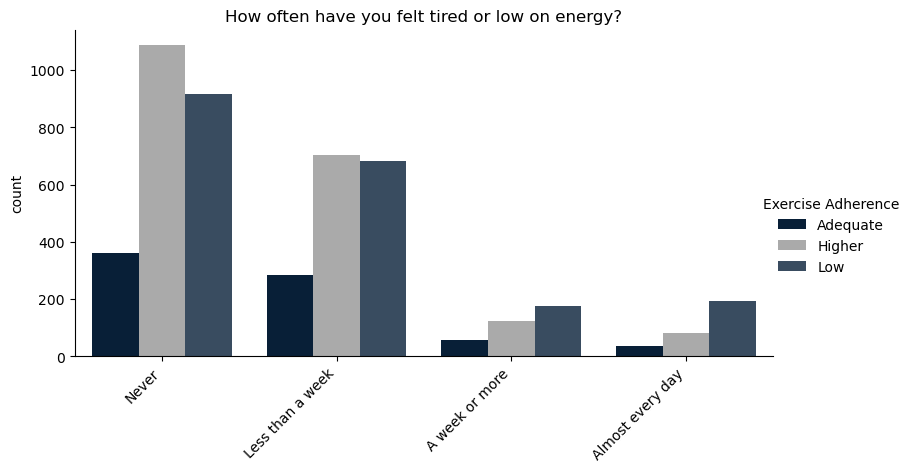

In [31]:
count = df_merge['DPQ040_cat'].value_counts()
order = count.index

# Criando o gráfico
g = sns.catplot(data=df_merge, x="DPQ040_cat", hue="ADHERENCE_cat", kind="count", height=4, aspect=2, order=order)

g.set_xticklabels(order, rotation=45, ha='right')  
g.set_axis_labels("", None)
g._legend.set_title("Exercise Adherence")

# Adicionando o título
plt.title("How often have you felt tired or low on energy?")
plt.show()

In [32]:
#chi quadrado: 2 categorical variables
# Criando uma tabela de contingência
table = pd.crosstab(df_merge['DPQ040_cat'], df_merge['ADHERENCE_cat'])

# Executando o Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(table)
print(f"Valor qui-quadrado: {chi2}")
print(f"Valor p: {p}")

def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

# Usando a tabela de contingência que definimos anteriormente
n = table.sum().sum()
k = len(table.columns)
r = len(table.index)

#coef cramer: A value close to 0 indicates no association between the variables
#while a value close to 1 suggests a strong association. Intermediate values indicate moderate associations.

V = cramers_v(chi2, n, k, r)
print(f"Coeficiente de Cramér (V): {V:.4f}")

Valor qui-quadrado: 77.70180535557222
Valor p: 1.0650918553657774e-14
Coeficiente de Cramér (V): 0.0909


# Qui-square between levels of fatigue and adherence to exercise
p-value is less than the significance level, the null hypothesis is not rejected.
There is a correlation between adherence to exercise and levels of fatigue 

# DPQ090: In the past 2 weeks, how often have you thought about hurting yourself in some way or that you would be better off dead?

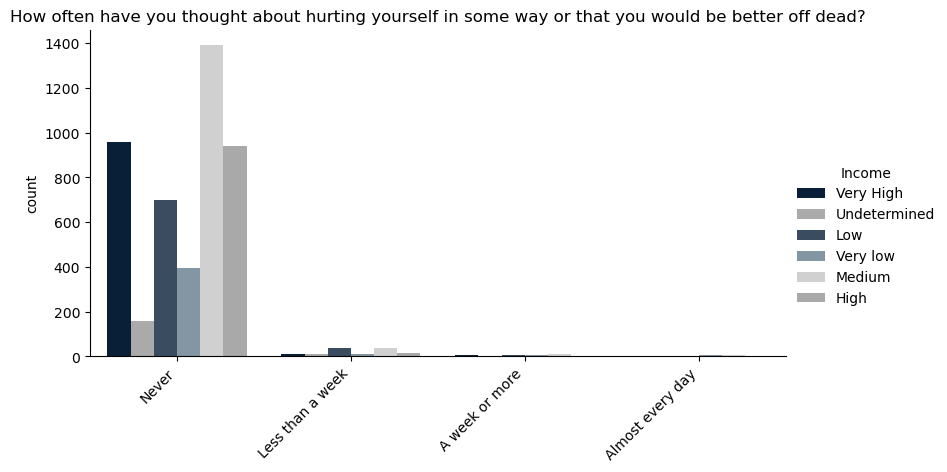

In [62]:
#Transforming in a categorical varriable
#Mapping with DP40 because is the same values of this variable 0 to 9 
df_merge['DPQ090_cat'] = df_merge['DPQ090'].replace(DPQ040_mapping)

# Criando o gráfico
#INDFMINC_cat salary amount 
g = sns.catplot(data=df_merge, x="DPQ090_cat", hue="INDFMINC_cat", kind="count", height=4, aspect=2, order=order)

g.set_xticklabels(order, rotation=45, ha='right')  
g.set_axis_labels("", None)
g._legend.set_title("Income")

# Adicionando o título
plt.title("How often have you thought about hurting yourself in some way or that you would be better off dead?")
plt.show()

In [34]:
# Criando uma tabela de contingência
#qui square with the borh categorical variables 
table = pd.crosstab(df_merge['DPQ090_cat'], df_merge['INDFMINC_cat'])

# Executando o Teste qui-quadrado
chi2, p, _, _ = chi2_contingency(table)
print(f"Valor qui-square: {chi2}")
print(f"Valor p: {p}")

def cramers_v(chi2, n, k, r):
    return np.sqrt(chi2 / (n * min(k-1, r-1)))

# Usando a tabela de contingência que definimos anteriormente
n = table.sum().sum()
k = len(table.columns)
r = len(table.index)

V = cramers_v(chi2, n, k, r)
print(f"Coeficiente de Cramér (V): {V:.4f}")

Valor qui-quadrado: 62.689760379224396
Valor p: 8.64603949121032e-08
Coeficiente de Cramér (V): 0.0667


# Explanation of the qui-square betweek levels of hurt and salary amount
 Qui-square between levels of hurt yourself and salary income
p-value is less than the significance level, and the null hypothesis is not rejected, however the observed effect is small.

There is a correlation between levels of hurt themselves and salary amount 

# Does the average DPQ_RANK vary by gender?

RANK between mental health and gender

In [63]:
#mapping ggender_mapping
gender_mapping = {1: "Masculino", 2: "Feminino"}
df_merge['RIAGENDR_cat'] = df_merge['RIAGENDR'].replace(gender_mapping).astype('category')

In [64]:
DPQ_RANK_h = df_merge['RANK'].loc[df_merge['RIAGENDR_cat'] == 'Masculino']
DPQ_RANK_m = df_merge['RANK'].loc[df_merge['RIAGENDR_cat'] == 'Feminino']

In [37]:
# Realizando o teste t para amostras independentes
#Analisisng the rank of all depression questions( DPQ RANK) score with gender so 1 categorical and one numerical

t_stat, p_value = ttest_ind(DPQ_RANK_h, DPQ_RANK_m)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the groups.")
    
def compute_ci(data, alpha=0.05):
    """Calculates the confidence interval for the mean of a data set."""
    n = len(data)
    mean = np.mean(data)
    se = sem(data)  # Erro padrão
    df = n - 1
    ci = stats.t.interval(1-alpha, df, loc=mean, scale=se)
    return mean, ci

mean_h, ci_h = compute_ci(DPQ_RANK_h)
mean_m, ci_m = compute_ci(DPQ_RANK_m)

print(f"DPQ_RANK mean for men: {mean_h:.2f}, IC: ({ci_h[0]:.2f}, {ci_h[1]:.2f})")
print(f"DPQ_RANK mean for women: {mean_m:.2f}, IC: ({ci_m[0]:.2f}, {ci_m[1]:.2f})")

t-statistic: -7.49845291143233
p-value: 7.675103240709812e-14
We reject the null hypothesis. There is a significant difference between the groups.
DPQ_RANK mean for men: 2.31, IC: (2.17, 2.45)
DPQ_RANK mean for women: 3.13, IC: (2.97, 3.28)


The results indicate that in terms of DPQ_RANK, there is a significant difference between men and women, with women having a higher average score compared to men.

# Does the rank vary depending on education level?

In [71]:
#categorizing education 
superior_incompleto = df_merge['RANK'].loc[df_merge['DMDEDUC_cat'] == 'Elementary education']
ensino_medio_completo = df_merge['RANK'].loc[df_merge['DMDEDUC_cat'] == 'Incomp. secondary education']
superior_completo = df_merge['RANK'].loc[df_merge['DMDEDUC_cat'] == 'Complete secondary education']
ensino_medio_incompleto = df_merge['RANK'].loc[df_merge['DMDEDUC_cat'] == 'Incomp higher education']
fundamental = df_merge['RANK'].loc[df_merge['DMDEDUC_cat'] == 'Complete higher education']
nao_sabe = df_merge['RANK'].loc[df_merge['DMDEDUC_cat'] == "Don't know"]

In [74]:
# Realizando a ANOVA
#using anova because is more than 2 samples. one way because is only 1 categorical factor = education 
f_stat, p_value = f_oneway(superior_incompleto, ensino_medio_completo, superior_completo, ensino_medio_incompleto, fundamental, nao_sabe)

print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the groups.")

f-statistic: 9.690874918955176
p-value: 3.200709294923921e-09
We reject the null hypothesis. There is a significant difference between the groups.


There is a statistic difference between the levels of education

In [77]:
tukey = pairwise_tukeyhsd(endog=df_merge['RANK'],groups=df_merge['DMDEDUC_cat'], alpha=0.05) 
print(tukey)
# There is a difference in DPQ_RANK for:
# elementary and higher education
# Completed high school and higher education
# Incomplete high school and higher education
# Completed higher education and incomplete higher education

                       Multiple Comparison of Means - Tukey HSD, FWER=0.05                       
           group1                       group2            meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------------------------------
   Complete higher education Complete secondary education   0.8376    0.0   0.3623  1.3129   True
   Complete higher education                   Don't know  -1.0163 0.9998 -11.6477  9.6152  False
   Complete higher education         Elementary education   1.0823    0.0   0.4838  1.6809   True
   Complete higher education      Incomp higher education   0.6873 0.0003   0.2236   1.151   True
   Complete higher education  Incomp. secondary education   1.1376    0.0   0.6168  1.6583   True
Complete secondary education                   Don't know  -1.8539 0.9963 -12.4836  8.7758  False
Complete secondary education         Elementary education   0.2447 0.8225  -0.3227  0.8121  False
Complete secondary e

A media varia conforme a etnia

In [78]:
#Transforming ethnicity in categorical value 
mex_amr = df_merge['RANK'].loc[df_merge['RIDRETH1_cat'] == 'Mexicano-americano']
outro = df_merge['RANK'].loc[df_merge['RIDRETH1_cat'] == 'Outro']
branco = df_merge['RANK'].loc[df_merge['RIDRETH1_cat'] == 'Branco não-hispânico']
hispanico = df_merge['RANK'].loc[df_merge['RIDRETH1_cat'] == 'Hispânico']
negro = df_merge['RANK'].loc[df_merge['RIDRETH1_cat'] == 'Negro não-hispânico']

In [80]:
# Realizando a ANOVA
#One way anova to 1 categorical factor and more than 2 samples 
f_stat, p_value = f_oneway(mex_amr, outro, branco, hispanico, negro)

print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Interpretando o resultado
alpha = 0.05
if p_value < alpha:
      print("We reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the groups.")

f-statistic: 2.3899010787592045
p-value: 0.04869122994870757
We reject the null hypothesis. There is a significant difference between the groups.


p-value is 0.048, very close to the significance level. However, if we perform the Tukey test, we will see that there is no significant difference between the groups.

In [81]:
#Complemented with tukey test to find out which specific group means, when compared with each other, are different

tukey = pairwise_tukeyhsd(endog=df_merge['RANK'],groups=df_merge['RIDRETH1_cat'], alpha=0.05) 
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1               group2       meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------------
Branco não-hispânico           Hispânico    0.149 0.9882 -0.6794 0.9774  False
Branco não-hispânico  Mexicano-americano  -0.1303 0.8929 -0.5209 0.2602  False
Branco não-hispânico Negro não-hispânico   0.6642 0.2747 -0.2501 1.5786  False
Branco não-hispânico               Outro   0.1581 0.8713 -0.2895 0.6057  False
           Hispânico  Mexicano-americano  -0.2793 0.8712 -1.0698 0.5112  False
           Hispânico Negro não-hispânico   0.5153 0.7343 -0.6286 1.6591  False
           Hispânico               Outro   0.0091    1.0  -0.811 0.8293  False
  Mexicano-americano Negro não-hispânico   0.7946 0.0992 -0.0856 1.6748  False
  Mexicano-americano               Outro   0.2885 0.2153 -0.0844 0.6613  False
 Negro não-hispânico               Outro  -0.5061 0.

# Does the average DPQ_RANK vary according to income?

In [84]:
#Salary amount categories count 
df_merge.INDFMINC_cat.value_counts()

INDFMINC_cat
Medium          1441
Very High        973
High             956
Low              744
Very low         417
Undetermined     171
Name: count, dtype: int64

In [87]:
media = df_merge['RANK'].loc[df_merge['INDFMINC_cat'] == 'Medium']
mtalta = df_merge['RANK'].loc[df_merge['INDFMINC_cat'] == 'Very High']
alta = df_merge['RANK'].loc[df_merge['INDFMINC_cat'] == 'High ']
baixa = df_merge['RANK'].loc[df_merge['INDFMINC_cat'] == 'Low']
mtbaixa = df_merge['RANK'].loc[df_merge['INDFMINC_cat'] == 'Very low']
ind = df_merge['RANK'].loc[df_merge['INDFMINC_cat'] == 'Undetermined ']

In [88]:
# Realizando a ANOVA
f_stat, p_value = f_oneway(media, mtalta, alta, baixa, mtbaixa, ind)

print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")

# Interpretando o resultado
alpha = 0.05
if round(p_value,2) < alpha:
   print("We reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference between the groups.")

f-statistic: nan
p-value: nan
We fail to reject the null hypothesis. There is no significant difference between the groups.


In [89]:
tukey = pairwise_tukeyhsd(endog=df_merge['RANK'],groups=df_merge['INDFMINC_cat'], alpha=0.05) 
print(tukey)

# There is a difference in DPQ_RANK for:
# High and Low Income
# High and Very Low Income
# Very High and Low Income
# Very High and Very Low Income
# Very High and Medium Income
# Low and Medium Income
# Very Low and Medium Income

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
        High          Low   1.2602    0.0  0.7448  1.7757   True
        High       Medium   0.2828 0.4441 -0.1569  0.7226  False
        High Undetermined   0.7697 0.1222 -0.1057   1.645  False
        High    Very High  -0.2815 0.5507 -0.7616  0.1986  False
        High     Very low   1.4801    0.0  0.8613  2.0988   True
         Low       Medium  -0.9774    0.0 -1.4534 -0.5015   True
         Low Undetermined  -0.4906 0.6223 -1.3846  0.4035  False
         Low    Very High  -1.5418    0.0 -2.0552 -1.0283   True
         Low     Very low   0.2198  0.927 -0.4251  0.8647  False
      Medium Undetermined   0.4868 0.5801 -0.3659  1.3395  False
      Medium    Very High  -0.5643 0.0032 -1.0018 -0.1269   True
      Medium     Very low   1.1972    0.0   0.611  1.7835   True
Undetermined    Very High

# Is there a correlation between DPQ_RANK and protein intake?
Using pearson correlation  to measure how strong is the correlation of the numerical values 

In [90]:
stats.pearsonr(df_merge.RANK, df_merge.HEI2015C7_TOTPROT)
#Yes, p<0.05 reject the h0 hiphotesis. In conclusion there's a correlation 

PearsonRResult(statistic=-0.0592467981977267, pvalue=4.800963933071834e-05)

# Is there a correlation between DPQ_RANK and sugar intake?

In [91]:
stats.pearsonr(df_merge.RANK, df_merge.HEI2015C13_ADDSUG)
#Yes, p<0.05 reject the h0 hiphotesis. In conclusion there's a correlation 

PearsonRResult(statistic=-0.08475953454486013, pvalue=5.850049565064827e-09)

# Is there a correlation between DPQ_RANK and the healthy eating score?

In [92]:
stats.pearsonr(df_merge.RANK, df_merge.HEI2015_TOTAL_SCORE)
#Yes, p<0.05 reject the h0 hiphotesis. In conclusion there's a correlation 

PearsonRResult(statistic=-0.07094563824018421, pvalue=1.1178707450863218e-06)

# Is there a correlation between DPQ_RANK and the amount of weekly physical exercise?

In [94]:
stats.pearsonr(df_merge.RANK, df_merge.PAG_MINW)
#Yes, p<0.05 reject the h0 hiphotesis. In conclusion there's a correlation 

PearsonRResult(statistic=-0.06861288234048915, pvalue=2.4873717777809446e-06)

Conclusion
Depressed profiles in 18 years old adults (2005-2006 EUA)
Gender and depression: Women tend to have higher DPQ_RANK scores, indicating a higher incidence or severity of depressive symptoms compared to men.

Education and depression: Individuals with a college degree tend to have lower DPQ_RANK (fewer depressive symptoms) compared to those with other levels of education.

Race/ethnicity and depression: There are significant differences in DPQ_RANK by race/ethnicity; however, a further test suggests that this difference may not be substantial.

Income and depression: Individuals with very low or low income had higher DPQ_RANK (more depressive symptoms) than those with high or very high income.

Lifestyle and Depression:

Diet and depression: 
There is a significant correlation between protein intake, sugar intake, and healthy eating score with DPQ_RANK, although these correlations are weak.

Physical activity and depression: 
There is a weak, significant correlation between the amount of weekly physical exercise and DPQ_RANK.

Chi-square tests indicate significant associations between several categorical variables, although the magnitude of these effects is often small, as indicated by Cramér's coefficient (V).

# This analysis provides a comprehensive overview of the associations between various socioeconomic characteristics, lifestyle, and mental health in the United States during 2005–2006.
# Further studies are needed to gain a more profound understanding, which may contribute to more effective strategies for preventing and treating depression.